# Handlers EXPERT

Esta tabla contiene la información adicional de las sentencias Try/TryStar. --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'handler__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('handlers')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-27 17:34:15.988972 Data cache files found ...
2024-05-27 17:34:15.991095 Data cache files successfully loaded!!
The dataset contains 8953 (82.88%) instances for BEGINNER class and 1850 (17.12%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'handlers'
TABLE_FEATURES = ['handler__number_of_handlers', 'handler__has_star', 'handler__has_finally', 'handler__has_catch_all', 'handler__average_body_count', 'handler__expertise_level']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (1850, 6)
As we can see the downloaded data contains a total of 1850 instances. For each instance we have 6 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1850 entries, 8953 to 10802
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   handler__number_of_handlers  1850 non-null   int64  
 1   handler__has_star            1850 non-null   bool   
 2   handler__has_finally         1850 non-null   bool   
 3   handler__has_catch_all       1850 non-null   bool   
 4   handler__average_body_count  1850 non-null   float64
 5   handler__expertise_level     1850 non-null   object 
dtypes: bool(3), float64(1), int64(1), object(1)
memory usage: 63.2+ KB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas, 3 de tipo boleano  y una de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [96.54%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

handler__number_of_handlers    0
handler__has_star              0
handler__has_finally           0
handler__has_catch_all         0
handler__average_body_count    0
handler__expertise_level       0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

handler__number_of_handlers
---------------------------
0 instancias no tienen un valor para la columna handler__number_of_handlers


handler__has_star
-----------------
0 instancias no tienen un valor para la columna handler__has_star


handler__has_finally
--------------------
0 instancias no tienen un valor para la columna handler__has_finally


handler__has_catch_all
----------------------
0 instancias no tienen un valor para la columna handler__has_catch_all


handler__average_body_count
---------------------------
0 instancias no tienen un valor para la columna handler__average_body_count


handler__expertise_level
------------------------
0 instancias no tienen un valor para la columna handler__expertise_level




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
handler__number_of_handlers,1850.0,NaN,NaN,NaN,1.047027,0.505732,0.0,1.0,1.0,1.0,9.0
handler__has_star,1850,1,False,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
handler__has_finally,1850,2,False,1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
handler__has_catch_all,1850,2,False,1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
handler__average_body_count,1850.0,NaN,NaN,NaN,1.513327,1.136354,0.0,1.0,1.0,2.0,11.0
handler__expertise_level,1850,1,EXPERT,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "handler__number_of_handlers": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)],  # min: 0.0 max: 9.0 
    "handler__average_body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 11.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['handler__number_of_handlers'], 10))
print(get_statistics(X_copy, ['handler__average_body_count'], 10))
print(get_statistics(X_copy, ['handler__has_star'], 10))
print(get_statistics(X_copy, ['handler__has_finally'], 10))
print(get_statistics(X_copy, ['handler__has_catch_all'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
handler__number_of_handlers  count  percentage
                  [1.0_1.0]   1613   87.189189
                  [1.0_inf]    138    7.459459
                  [0.0_0.0]     99    5.351351

handler__average_body_count  count  percentage
                  [1.0_2.0)   1157   62.540541
                  [2.0_inf]    594   32.108108
                  [0.0_1.0)     99    5.351351

 handler__has_star  count  percentage
             False   1850       100.0

 handler__has_finally  count  percentage
                False   1665        90.0
                 True    185        10.0

 handler__has_catch_all  count  percentage
                  False   1564   84.540541
                   True    286   15.459459

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1850, 6)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

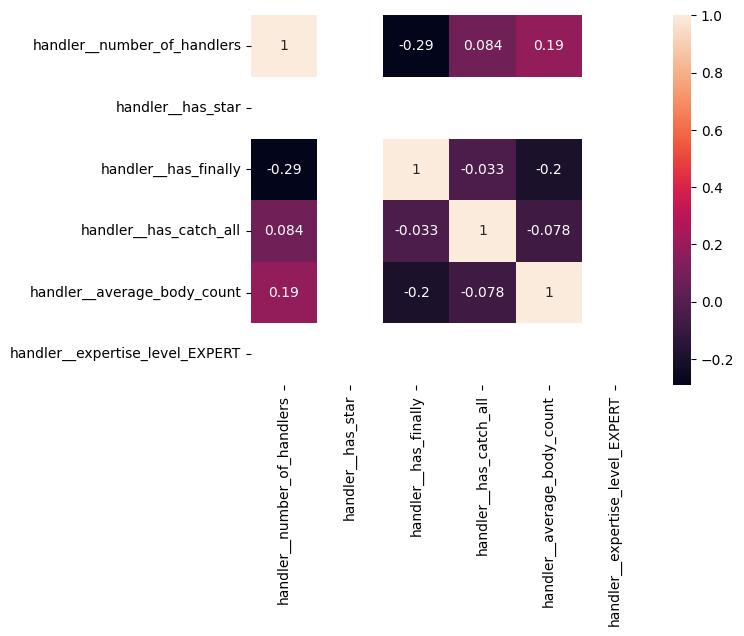

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 5 variable (2 numericas y 3 booleanas) se hara un analisis detallado

### Variable number_of_handlers (1/5)
Esta variable es de tipo numérica y nos indica el número de clausulas except en la sentencia Try. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 9. Con una media de 1.04.

<Axes: ylabel='handler__number_of_handlers'>

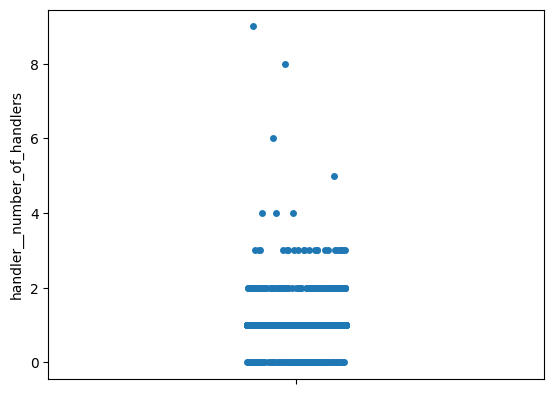

In [11]:
sns.stripplot(X['handler__number_of_handlers'])

In [12]:
print_outliers_for_df_column(X, 'handler__number_of_handlers')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8307004398312097
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 99 instancias tienen un valor para handler__number_of_handlers inferior a 1.0 (Q1-3*IQR) para handler__number_of_handlers. Representando un 5.351% del total de instancias.
-1.5IQR: 99 instancias tienen un valor para handler__number_of_handlers inferior a 1.0 (Q1-1.5*IQR) para handler__number_of_handlers. Representando un 5.351% del total de instancias.
+1.5IQR: 138 instancias tienen un valor para handler__number_of_handlers superior a 1.0 (Q3+1.5*IQR) para handler__number_of_handlers. Representando un 7.459% del total de instancias.
+3.0IQR: 138 instancias tienen un valor para handler__number_of_handlers superior a 1.0 (Q3-3*IQR) para handler__number_of_handlers. Representando un 7.459% del total de instancias.
L: 99 instancias tienen un valor pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 o menor que 1 (Todos los umbrales son 1)

In [13]:
X[(X['handler__number_of_handlers'] > 1) | (X['handler__number_of_handlers'] < 1)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,handler__number_of_handlers,handler__has_star,handler__has_finally,handler__has_catch_all,handler__average_body_count,handler__expertise_level_EXPERT
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0
mean,1.367089,0.0,0.468354,0.135021,0.969011,1.0
std,1.373267,0.0,0.500054,0.342469,1.255280,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,1.0
50%,2.000000,0.0,0.000000,0.000000,1.000000,1.0
75%,2.000000,0.0,1.000000,0.000000,1.500000,1.0
max,9.000000,0.0,1.000000,1.000000,9.000000,1.0


### Variable average_body_count (2/5)
Esta variable representa el número medio de sentencias en los cuerpos del try y los except. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 11. Con una media de 1.5.

<Axes: ylabel='handler__average_body_count'>

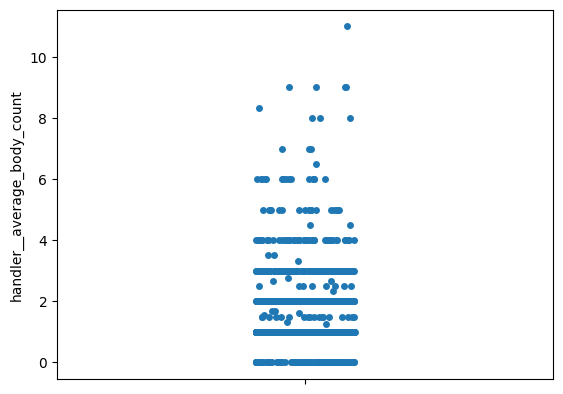

In [14]:
sns.stripplot(X['handler__average_body_count'])

In [15]:
print_outliers_for_df_column(X, 'handler__average_body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6613146634363312
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8517916483684745,23.130632435129733]
-3.0IQR: 0 instancias tienen un valor para handler__average_body_count inferior a -2.0 (Q1-3*IQR) para handler__average_body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para handler__average_body_count inferior a -0.5 (Q1-1.5*IQR) para handler__average_body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 100 instancias tienen un valor para handler__average_body_count superior a 3.5 (Q3+1.5*IQR) para handler__average_body_count. Representando un 5.405% del total de instancias.
+3.0IQR: 29 instancias tienen un valor para handler__average_body_count superior a 5.0 (Q3-3*IQR) para handler__average_body_count. Representando un 1.568% del total de instancias.
L: 99 in

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 66 usamos Tuckey Extremo)

In [16]:
X[X['handler__average_body_count'] > 5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,handler__number_of_handlers,handler__has_star,handler__has_finally,handler__has_catch_all,handler__average_body_count,handler__expertise_level_EXPERT
count,29.000000,29.0,29.000000,29.000000,29.000000,29.0
mean,1.172414,0.0,0.034483,0.103448,6.994253,1.0
std,0.539111,0.0,0.185695,0.309934,1.376159,0.0
min,1.000000,0.0,0.000000,0.000000,6.000000,1.0
25%,1.000000,0.0,0.000000,0.000000,6.000000,1.0
50%,1.000000,0.0,0.000000,0.000000,6.000000,1.0
75%,1.000000,0.0,0.000000,0.000000,8.000000,1.0
max,3.000000,0.0,1.000000,1.000000,11.000000,1.0


### Variable has_star (3/5)
Esta variable es de tipo booleano y representa es una sentencia del tipo TryStar.

<Axes: xlabel='handler__has_star', ylabel='Count'>

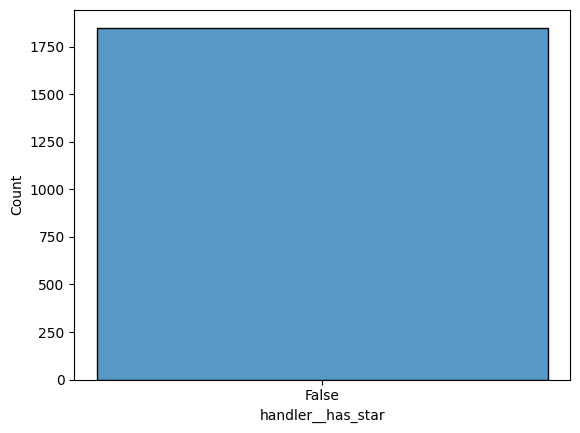

In [17]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['handler__has_star'], discrete=True)

In [18]:
num_true_values = len(X[X['handler__has_star'] == True])
num_false_values = len(X[X['handler__has_star'] == False])
std = X['handler__has_star'].std()
freq_true = len(X[X['handler__has_star'] == True]) / len(X['handler__has_star'])
freq_false = len(X[X['handler__has_star'] == False]) / len(X['handler__has_star'])
print(f'La variable has_star contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_star a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_star a False es {freq_false}.')

La variable has_star contiene 0 valores verdaderos y 1850 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_star a True es 0.0.
La frecuencia con la que programa puede tener la variable has_star a False es 1.0.


In [19]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'handler__has_star', possible_values)

La variable handler__has_star contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable handler__has_star toma el valor de 0.0 en un 100.0% de los items.
La variable handler__has_star toma el valor de True en un 0.0% de los items. [OUTLIER]


### IMPORTANTE 

No hay ningun try del tipo TryStar por lo que ninguna entrada toma el valor True para has_star

### Variable has_catch_all (4/5)
Esta variable es de tipo booleano y representa si el try tiene un except all.

<Axes: xlabel='handler__has_catch_all', ylabel='Count'>

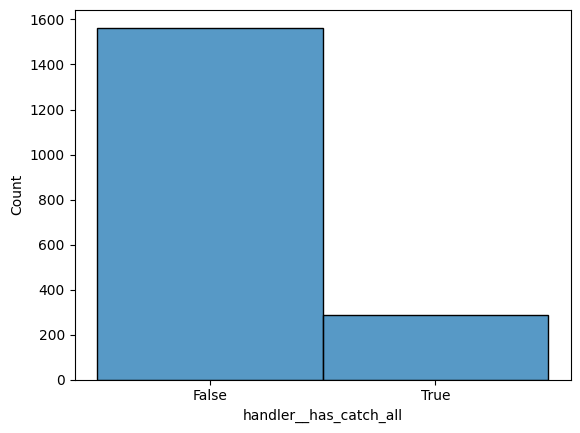

In [20]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['handler__has_catch_all'], discrete=True)

In [21]:
num_true_values = len(X[X['handler__has_catch_all'] == True])
num_false_values = len(X[X['handler__has_catch_all'] == False])
std = X['handler__has_catch_all'].std()
freq_true = len(X[X['handler__has_catch_all'] == True]) / len(X['handler__has_catch_all'])
freq_false = len(X[X['handler__has_catch_all'] == False]) / len(X['handler__has_catch_all'])
print(f'La variable has_catch_all contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_catch_all a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_catch_all a False es {freq_false}.')

La variable has_catch_all contiene 286 valores verdaderos y 1564 valores falsos. Y, la desviación típica es de 0.36161553859710693
La frecuencia con la que programa puede tener la variable has_catch_all a True es 0.1545945945945946.
La frecuencia con la que programa puede tener la variable has_catch_all a False es 0.8454054054054054.


In [22]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'handler__has_catch_all', possible_values)

La variable handler__has_catch_all contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable handler__has_catch_all toma el valor de 0.0 en un 84.54% de los items.
La variable handler__has_catch_all toma el valor de 1.0 en un 15.46% de los items.


In [23]:
X[X['handler__has_catch_all'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,handler__number_of_handlers,handler__has_star,handler__has_finally,handler__has_catch_all,handler__average_body_count,handler__expertise_level_EXPERT
count,286.000000,286.0,286.000000,286.0,286.000000,286.0
mean,1.146853,0.0,0.076923,1.0,1.305070,1.0
std,0.548786,0.0,0.266936,0.0,0.887921,0.0
min,1.000000,0.0,0.000000,1.0,1.000000,1.0
25%,1.000000,0.0,0.000000,1.0,1.000000,1.0
50%,1.000000,0.0,0.000000,1.0,1.000000,1.0
75%,1.000000,0.0,0.000000,1.0,1.000000,1.0
max,8.000000,0.0,1.000000,1.0,9.000000,1.0


### Variable has_finally (5/5)
Esta variable es de tipo booleano y representa si el Try tiene la clausula finally.

<Axes: xlabel='handler__has_finally', ylabel='Count'>

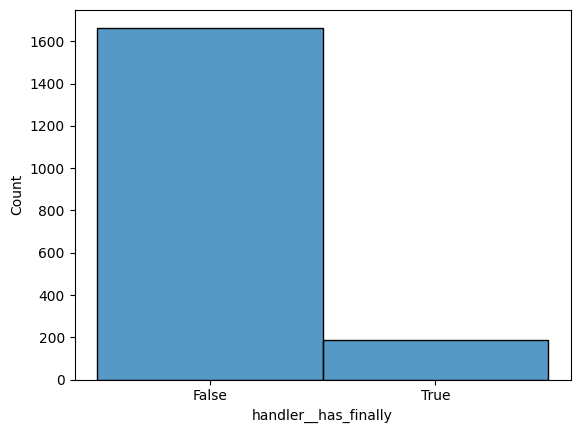

In [24]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['handler__has_finally'], discrete=True)

In [25]:
num_true_values = len(X[X['handler__has_finally'] == True])
num_false_values = len(X[X['handler__has_finally'] == False])
std = X['handler__has_finally'].std()
freq_true = len(X[X['handler__has_finally'] == True]) / len(X['handler__has_finally'])
freq_false = len(X[X['handler__has_finally'] == False]) / len(X['handler__has_finally'])
print(f'La variable has_finally contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_finally a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_finally a False es {freq_false}.')

La variable has_finally contiene 185 valores verdaderos y 1665 valores falsos. Y, la desviación típica es de 0.3000811040401459
La frecuencia con la que programa puede tener la variable has_finally a True es 0.1.
La frecuencia con la que programa puede tener la variable has_finally a False es 0.9.


In [26]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'handler__has_finally', possible_values)

La variable handler__has_finally contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable handler__has_finally toma el valor de 0.0 en un 90.0% de los items.
La variable handler__has_finally toma el valor de 1.0 en un 10.0% de los items.


In [27]:
X[X['handler__has_finally'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,handler__number_of_handlers,handler__has_star,handler__has_finally,handler__has_catch_all,handler__average_body_count,handler__expertise_level_EXPERT
count,185.000000,185.0,185.0,185.000000,185.000000,185.0
mean,0.605405,0.0,1.0,0.118919,0.844234,1.0
std,0.933072,0.0,0.0,0.324571,1.240095,0.0
min,0.000000,0.0,1.0,0.000000,0.000000,1.0
25%,0.000000,0.0,1.0,0.000000,0.000000,1.0
50%,0.000000,0.0,1.0,0.000000,0.000000,1.0
75%,1.000000,0.0,1.0,0.000000,1.000000,1.0
max,8.000000,0.0,1.0,1.000000,8.333333,1.0


## Multivariate

TODO: isolation forest algorithm

In [28]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,handler__number_of_handlers,handler__has_finally,handler__has_catch_all,handler__average_body_count,handler__has_star,handler__expertise_level
9317,3,True,False,8.333333,False,EXPERT
9319,3,True,True,2.000000,False,EXPERT
9998,8,True,True,2.750000,False,EXPERT


### IMPORTANTE
Hay que analizar los 3 outliers detectados